## VAISHNAVI JAMDADE(TM39453)
### HOMEWORK 4

### Importing required libraries:

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import idx2numpy
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

### Converting the file into numpy array of dimensions (60000,28,28)

In [77]:
def convertfunc(file):
    arr = idx2numpy.convert_from_file(file)
    return arr

In [78]:
X_train=convertfunc('train-images.idx3-ubyte')
y_train=convertfunc('train-labels.idx1-ubyte')
X_test=convertfunc('t10k-images.idx3-ubyte')
y_test=convertfunc('t10k-labels.idx1-ubyte')

In [79]:
X_train.shape

(60000, 28, 28)

In [80]:
X_test.shape, y_train.shape

((10000, 28, 28), (60000,))

### Reshaping the dataset :

In [81]:
def reshapefunc(array,rows,columns):
    array=array.reshape(rows,columns)
    return array

In [82]:
X_train=reshapefunc(X_train,60000,784)
X_test=reshapefunc(X_test,10000,784)
#y_train=reshapefunc(y_train,1,60000)
#y_test=reshapefunc(y_test,1,10000)

In [83]:
X_train.shape,X_test.shape, y_train.shape,y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

### Splitting Training data into Training and Validation dataset

* For Question 3, Here we have split the original X_train(training dataset) into X_trainval and X_testval where we will train our model with 4 configurations on our X_trainval data, and then evaluate it on our Validation dataset that is, X_testval

In [84]:
X_trainval,X_testval,y_trainval,y_testval=train_test_split(X_train,y_train,test_size=0.3, random_state=42)

In [85]:
X_trainval.shape, X_testval.shape, y_trainval.shape,y_testval.shape

((42000, 784), (18000, 784), (42000,), (18000,))

### Using One hot label encoding for output labels:

In [86]:
y_trainnew=y_train
y_train.shape

(60000,)

In [12]:
y_train = pd.get_dummies(y_train)
y_train=np.array(y_train)

In [13]:
y_train.shape

(60000, 10)

### Using one hot label encoding for validation output labels:

In [14]:
y_trainval = pd.get_dummies(y_trainval)
y_trainval=np.array(y_trainval)

In [15]:
y_trainval.shape

(42000, 10)

In [16]:
y_train.shape

(60000, 10)

### Initializing weights and bias:

In [17]:
def initialize_weights(inputs, hNeurons, oNeurons):

    weights1=np.random.randn(inputs,hNeurons)*np.sqrt(1./inputs)    #784 rows 5 columns
    bias1=np.zeros((1, hNeurons))*np.sqrt(1./inputs)
    #hence x.w = 1,5 dimensions + bias [1,5]
    weights2=np.random.randn(hNeurons,oNeurons)*np.sqrt(1./hNeurons)
    #hence x.w= 5,10 dimensions + bias [1,10]
    bias2= np.zeros((1, oNeurons))*np.sqrt(1./hNeurons)

    #ouptut vecotr is going to be of dimensions [1,10] then softmax
    #W1.shape , b1.shape, W2.shape, b2.shape
    
    return weights1, bias1, weights2, bias2


### Sigmoid Activation Function:

In [18]:
def sigmoid(z):
    act = 1. / (1. + np.exp(-z))
    return act

### Tanh Activation Function :

In [19]:
def tanh(z):
    tanhact=(np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))
    return tanhact

### Softmax Activation function :

In [20]:
#Normalising the values:

def softmax(z):
    softact = np.exp(z)/np.sum(np.exp(z), axis=1,keepdims=True)                                       
    return softact


### Feed Forward Function :

In [21]:
def feedforward(X_t,W1,b1,W2,b2,actfunc):
    z1= np.dot(X_t,W1)+b1
    h1=actfunc(z1)
    
    z2=np.dot(h1,W2)+b2
    output=softmax(z2)
    return z1, h1, z2, output
        

### Error Function :

In [22]:
def error(ypred,y_t):     
    n_samples = y_t.shape[0]
    L = (ypred-y_t)/n_samples
    return L    

### Cross Entropy Loss Function:

In [23]:
def crossentropy(ypred,y_t):
    L_sum = np.sum(np.multiply(y_t, np.log(ypred)))
    num_samples = y_t.shape[0]
    L = -(1./num_samples) * L_sum

    return L

### Function to calculate Sigmoid Derivative:

In [24]:
def sigmoid_derivative(h1):
    deriv_s=h1*(1-h1)
    return deriv_s

### Function to calculate Tanh derivative :

In [25]:
def tanh_derivative(h1):
    deriv_t=1-h1**2
    return deriv_t

### Backpropagation Function to compute Gradient Information:

In [26]:
def backpropagation(h1,W2,ypred,y_t,X_t,derivfunc):
    
    #Calculate error
    L=error(ypred,y_t)
    
    # z1, h1, z2, output
    # z1, and z2 => dot products
    # h1 and output => activations
    change_output=L
    #dL/dW2
    delta_W2= np.dot(h1.T,change_output)
    
    #dL/db2
    delta_b2= np.sum(change_output,axis=0,keepdims=True)
    
    #dL/dh1
    delta_h1=np.dot(change_output,W2.T)

    change_h1= delta_h1*derivfunc(h1)
    
    #dL/dW1
    delta_W1= np.dot(X_t.T, change_h1)
    
    #dL/db1
    delta_b1= np.sum(change_h1,axis=0,keepdims=True)
    
    return delta_W2, delta_b2, delta_W1, delta_b1
    

### Function to update weights:

In [27]:
def update_weights(alpha,W1,b1,W2,b2,delta_W2,delta_b2,delta_W1,delta_b1):
    W2= W2- alpha*(delta_W2)
    b2= b2 - alpha*(delta_b2)
    W1= W1- alpha*(delta_W1)
    b1=b1- alpha*(delta_b1)
    
    return W2,b2,W1,b1

### Training Function:

In [28]:
def training(X_t,y_t,neurons,lr,iterations,actfunc,derivfunc):
    hNeurons=neurons                              #hidden neuron
    inputs=X_t.shape[1]                   #number of inputs
    oNeurons=y_t.shape[1]
    alpha= lr                       #learning rate
    epochs=iterations
    
    #retriving the actual labels for y_train:
    labely_train=np.argmax(y_t,axis=1)
    
    #initialize weights
    W1, b1, W2, b2= initialize_weights(inputs,hNeurons,oNeurons)
    li=[]
    listloss=[]
    for i in range(epochs):
        
        #feed forward
        dotprod1, h1, dotprod2, output=feedforward(X_t,W1,b1,W2,b2,actfunc)

        #back propogate
        delta_W2, delta_b2, delta_W1, delta_b1= backpropagation(h1,W2,output,y_t,X_t,derivfunc)
        
        #update weights using gradient descent
        W2,b2,W1,b1=update_weights(alpha,W1,b1,W2,b2,delta_W2,delta_b2,delta_W1,delta_b1)

        #again feed forward using updated weights
        dotprod1, h1, dotprod2, output=feedforward(X_t,W1,b1,W2,b2,actfunc)

        #Calculating Total Loss
        loss=crossentropy(output,y_t)                 # put in training func later
        print("Epoch {}: training loss = {}".format(i + 1,loss))
        listloss.append(loss)

        #Retrieving the corresponding class labels:
        labelpred=np.argmax(output,axis=1)
        
        #Training Accuracy:
        accuracy = round((accuracy_score(labely_train, labelpred)*100),2)
        print("Training Accuracy after Epoch {} : {}%".format(i+1, accuracy))
        li.append(accuracy)
        
    return W2,b2,W1,b1,li,listloss
        


### Testing Function:

In [29]:
def testing(W2,b2,W1,b1,X_t,y_t,actfunc):
    
    dotprod1, h1, dotprod2, output=feedforward(X_t,W1,b1,W2,b2,actfunc)   
    labely_test=y_t
    labelpred=np.argmax(output,axis=1)
    #accuracytest = round((accuracy_score(labely_test, labelpred)*100),2)        
    #print("Accuracy on Testing data : {}%".format(accuracytest))
    return labely_test,labelpred
        

### Function to measure accuracy:

In [30]:
def accuracy(labely_test, labelpred):
    accuracytest = round((accuracy_score(labely_test, labelpred)*100),2)        
    #print("Accuracy : {}%".format(accuracytest))
    return accuracytest

## Configuration 1 :
* Number of neurons = 64
* Learning rate = 0.01
* Iteratations =300
* Activation Function : Sigmoid

In [31]:
W2,b2,W1,b1,li1,loss1=training(X_trainval,y_trainval,64,0.01,300,sigmoid,sigmoid_derivative)

Epoch 1: training loss = 2.4378994118199926
Training Accuracy after Epoch 1 : 11.69%
Epoch 2: training loss = 2.39796223947657
Training Accuracy after Epoch 2 : 13.02%
Epoch 3: training loss = 2.3608709309923737
Training Accuracy after Epoch 3 : 14.41%
Epoch 4: training loss = 2.3263803612582663
Training Accuracy after Epoch 4 : 16.0%
Epoch 5: training loss = 2.293933504367141
Training Accuracy after Epoch 5 : 17.49%
Epoch 6: training loss = 2.264095363280734
Training Accuracy after Epoch 6 : 18.98%
Epoch 7: training loss = 2.2359090863638778
Training Accuracy after Epoch 7 : 20.56%
Epoch 8: training loss = 2.2100257945067794
Training Accuracy after Epoch 8 : 22.26%
Epoch 9: training loss = 2.1856118785076277
Training Accuracy after Epoch 9 : 23.66%
Epoch 10: training loss = 2.1621966076521635
Training Accuracy after Epoch 10 : 25.12%
Epoch 11: training loss = 2.139804919051724
Training Accuracy after Epoch 11 : 26.49%
Epoch 12: training loss = 2.118926718621406
Training Accuracy after

Epoch 96: training loss = 1.399743821991576
Training Accuracy after Epoch 96 : 71.27%
Epoch 97: training loss = 1.3952748228409115
Training Accuracy after Epoch 97 : 71.41%
Epoch 98: training loss = 1.3908068806693468
Training Accuracy after Epoch 98 : 71.57%
Epoch 99: training loss = 1.3863149916275113
Training Accuracy after Epoch 99 : 71.71%
Epoch 100: training loss = 1.3817720116538235
Training Accuracy after Epoch 100 : 71.9%
Epoch 101: training loss = 1.3772232172798455
Training Accuracy after Epoch 101 : 72.0%
Epoch 102: training loss = 1.3727813638199882
Training Accuracy after Epoch 102 : 72.12%
Epoch 103: training loss = 1.3684440705364838
Training Accuracy after Epoch 103 : 72.26%
Epoch 104: training loss = 1.3641731384675737
Training Accuracy after Epoch 104 : 72.41%
Epoch 105: training loss = 1.3599384373062522
Training Accuracy after Epoch 105 : 72.54%
Epoch 106: training loss = 1.355717306229669
Training Accuracy after Epoch 106 : 72.68%
Epoch 107: training loss = 1.3515

Epoch 189: training loss = 1.0827531309820302
Training Accuracy after Epoch 189 : 80.04%
Epoch 190: training loss = 1.0802516002031763
Training Accuracy after Epoch 190 : 80.07%
Epoch 191: training loss = 1.077777209317196
Training Accuracy after Epoch 191 : 80.09%
Epoch 192: training loss = 1.075324019818414
Training Accuracy after Epoch 192 : 80.15%
Epoch 193: training loss = 1.072878639709743
Training Accuracy after Epoch 193 : 80.21%
Epoch 194: training loss = 1.070439822907809
Training Accuracy after Epoch 194 : 80.25%
Epoch 195: training loss = 1.0680252000759538
Training Accuracy after Epoch 195 : 80.31%
Epoch 196: training loss = 1.0656451053853324
Training Accuracy after Epoch 196 : 80.38%
Epoch 197: training loss = 1.0632925200438952
Training Accuracy after Epoch 197 : 80.46%
Epoch 198: training loss = 1.0609610618184382
Training Accuracy after Epoch 198 : 80.53%
Epoch 199: training loss = 1.0586443243490982
Training Accuracy after Epoch 199 : 80.57%
Epoch 200: training loss 

Epoch 282: training loss = 0.9036024882780794
Training Accuracy after Epoch 282 : 83.75%
Epoch 283: training loss = 0.9020528144576964
Training Accuracy after Epoch 283 : 83.77%
Epoch 284: training loss = 0.9005161187548951
Training Accuracy after Epoch 284 : 83.79%
Epoch 285: training loss = 0.8989769162778344
Training Accuracy after Epoch 285 : 83.81%
Epoch 286: training loss = 0.8974375685152366
Training Accuracy after Epoch 286 : 83.84%
Epoch 287: training loss = 0.89591404514937
Training Accuracy after Epoch 287 : 83.87%
Epoch 288: training loss = 0.8944115205031341
Training Accuracy after Epoch 288 : 83.89%
Epoch 289: training loss = 0.8929194157161293
Training Accuracy after Epoch 289 : 83.93%
Epoch 290: training loss = 0.8914303195031447
Training Accuracy after Epoch 290 : 83.98%
Epoch 291: training loss = 0.8899416942338635
Training Accuracy after Epoch 291 : 84.0%
Epoch 292: training loss = 0.8884600339964606
Training Accuracy after Epoch 292 : 84.01%
Epoch 293: training loss

## Test Loss using Configuration 1:

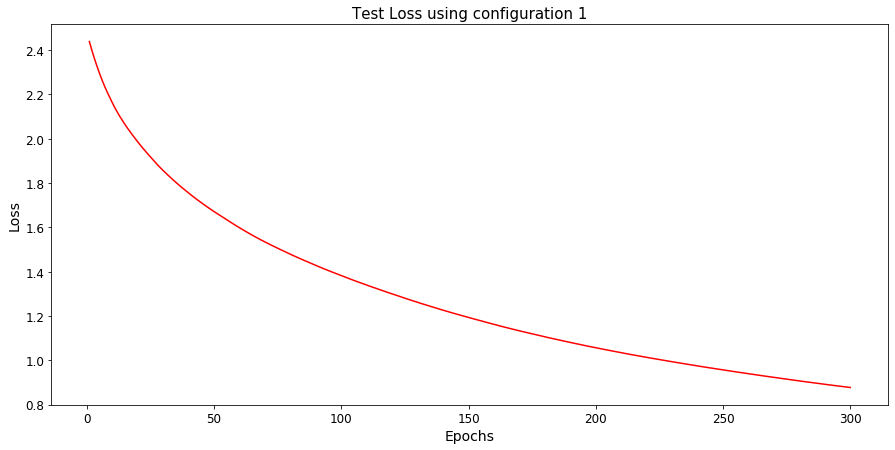

In [32]:
epochs = list(range(1,300+1))
loss= loss1
plt.figure(figsize=(15,7))
plt.title('Test Loss using configuration 1', fontsize=15)
plt.xlabel('Epochs', size=14)
plt.ylabel('Loss', fontsize=14)
plt.tick_params(labelsize=12);
#plt.scatter(epochs,loss,alpha=1,c='green')
plt.plot(epochs,loss,c='red')


### Plotting training accuracies :

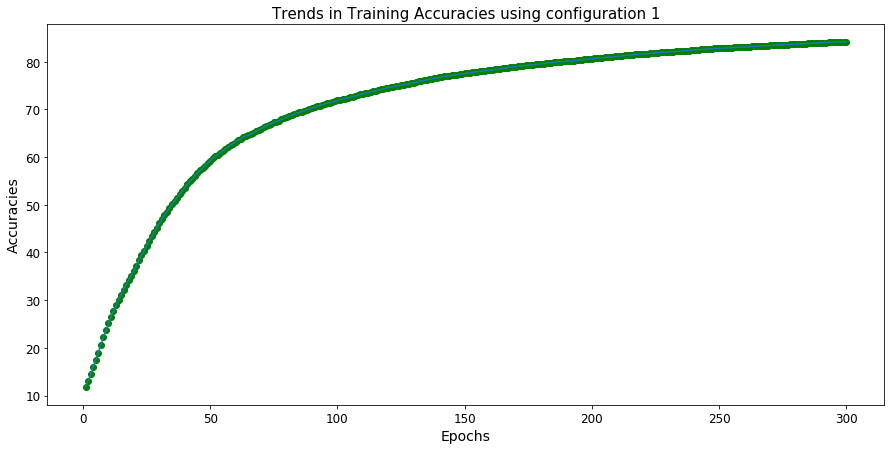

In [33]:
epochs = list(range(1,300+1))
accuracies= li1
plt.figure(figsize=(15,7))
plt.title('Trends in Training Accuracies using configuration 1', fontsize=15)
plt.xlabel('Epochs', size=14)
plt.ylabel('Accuracies', fontsize=14)
plt.tick_params(labelsize=12);
plt.scatter(epochs,accuracies,alpha=1,c='green')
plt.plot(epochs,accuracies)


### Evaluating on Validation data using configuration 1:

In [34]:
labely_test,labelpred=testing(W2,b2,W1,b1,X_testval,y_testval,sigmoid)
accuracy_val=accuracy(labely_test, labelpred)
print("Accuracy on Validation data using configuration 1: {}%".format(accuracy_val))
acc1=accuracy_val

Accuracy on Validation data using configuration 1: 83.43%


## Configuration 2 :
* Number of neurons = 64
* Learning rate = 0.05
* Iteratations =300
* Activation Function : Sigmoid

In [35]:
W2,b2,W1,b1,li2,loss2=training(X_trainval,y_trainval,64,0.05,300,sigmoid, sigmoid_derivative)

Epoch 1: training loss = 2.2669175230933987
Training Accuracy after Epoch 1 : 13.08%
Epoch 2: training loss = 2.1308644087006114
Training Accuracy after Epoch 2 : 23.09%
Epoch 3: training loss = 2.0226069858501172
Training Accuracy after Epoch 3 : 34.11%
Epoch 4: training loss = 1.9340098933622039
Training Accuracy after Epoch 4 : 42.02%
Epoch 5: training loss = 1.8588591915049013
Training Accuracy after Epoch 5 : 47.48%
Epoch 6: training loss = 1.793099183835952
Training Accuracy after Epoch 6 : 51.83%
Epoch 7: training loss = 1.7347867526086567
Training Accuracy after Epoch 7 : 55.45%
Epoch 8: training loss = 1.681205083399042
Training Accuracy after Epoch 8 : 58.58%
Epoch 9: training loss = 1.6343648029775286
Training Accuracy after Epoch 9 : 60.99%
Epoch 10: training loss = 1.5936809986062082
Training Accuracy after Epoch 10 : 63.01%
Epoch 11: training loss = 1.5552144976453752
Training Accuracy after Epoch 11 : 64.73%
Epoch 12: training loss = 1.5188919889692516
Training Accuracy 

Epoch 96: training loss = 0.6676435335972304
Training Accuracy after Epoch 96 : 87.37%
Epoch 97: training loss = 0.6644786320598397
Training Accuracy after Epoch 97 : 87.34%
Epoch 98: training loss = 0.6612771998600682
Training Accuracy after Epoch 98 : 87.44%
Epoch 99: training loss = 0.6578704954528293
Training Accuracy after Epoch 99 : 87.52%
Epoch 100: training loss = 0.6545675298428952
Training Accuracy after Epoch 100 : 87.56%
Epoch 101: training loss = 0.651307434367353
Training Accuracy after Epoch 101 : 87.64%
Epoch 102: training loss = 0.6485315440264913
Training Accuracy after Epoch 102 : 87.68%
Epoch 103: training loss = 0.6453276844284498
Training Accuracy after Epoch 103 : 87.68%
Epoch 104: training loss = 0.6424207393518591
Training Accuracy after Epoch 104 : 87.81%
Epoch 105: training loss = 0.6391465783141876
Training Accuracy after Epoch 105 : 87.77%
Epoch 106: training loss = 0.6361362051975912
Training Accuracy after Epoch 106 : 87.87%
Epoch 107: training loss = 0.6

Epoch 189: training loss = 0.4800239114427123
Training Accuracy after Epoch 189 : 89.94%
Epoch 190: training loss = 0.47831942392115595
Training Accuracy after Epoch 190 : 89.92%
Epoch 191: training loss = 0.47713808476948016
Training Accuracy after Epoch 191 : 90.0%
Epoch 192: training loss = 0.4756993608208599
Training Accuracy after Epoch 192 : 90.01%
Epoch 193: training loss = 0.4752807925948707
Training Accuracy after Epoch 193 : 89.97%
Epoch 194: training loss = 0.4738224050937368
Training Accuracy after Epoch 194 : 90.0%
Epoch 195: training loss = 0.4730328255804766
Training Accuracy after Epoch 195 : 90.06%
Epoch 196: training loss = 0.47230355805780216
Training Accuracy after Epoch 196 : 90.02%
Epoch 197: training loss = 0.47081930915495185
Training Accuracy after Epoch 197 : 90.05%
Epoch 198: training loss = 0.4700748537028391
Training Accuracy after Epoch 198 : 90.03%
Epoch 199: training loss = 0.468640369822751
Training Accuracy after Epoch 199 : 90.09%
Epoch 200: training 

Epoch 281: training loss = 0.3985708529459856
Training Accuracy after Epoch 281 : 91.13%
Epoch 282: training loss = 0.39759990413427376
Training Accuracy after Epoch 282 : 91.15%
Epoch 283: training loss = 0.3967269711361063
Training Accuracy after Epoch 283 : 91.19%
Epoch 284: training loss = 0.39582068203977655
Training Accuracy after Epoch 284 : 91.13%
Epoch 285: training loss = 0.39552259503456916
Training Accuracy after Epoch 285 : 91.21%
Epoch 286: training loss = 0.39428035559456076
Training Accuracy after Epoch 286 : 91.2%
Epoch 287: training loss = 0.39412686583908985
Training Accuracy after Epoch 287 : 91.18%
Epoch 288: training loss = 0.39387632548578977
Training Accuracy after Epoch 288 : 91.17%
Epoch 289: training loss = 0.39202296287222904
Training Accuracy after Epoch 289 : 91.24%
Epoch 290: training loss = 0.39186931067655695
Training Accuracy after Epoch 290 : 91.2%
Epoch 291: training loss = 0.39214154260301576
Training Accuracy after Epoch 291 : 91.18%
Epoch 292: tra

## Test Loss using configuration 2:

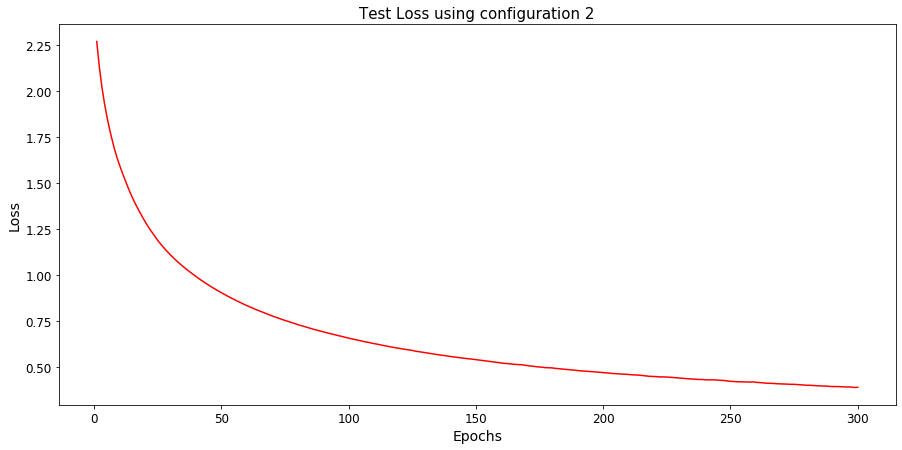

In [36]:
epochs = list(range(1,300+1))
loss= loss2
plt.figure(figsize=(15,7))
plt.title('Test Loss using configuration 2', fontsize=15)
plt.xlabel('Epochs', size=14)
plt.ylabel('Loss', fontsize=14)
plt.tick_params(labelsize=12);
#plt.scatter(epochs,loss,alpha=1,c='green')
plt.plot(epochs,loss,c='red')


## Plotting training accuracies :

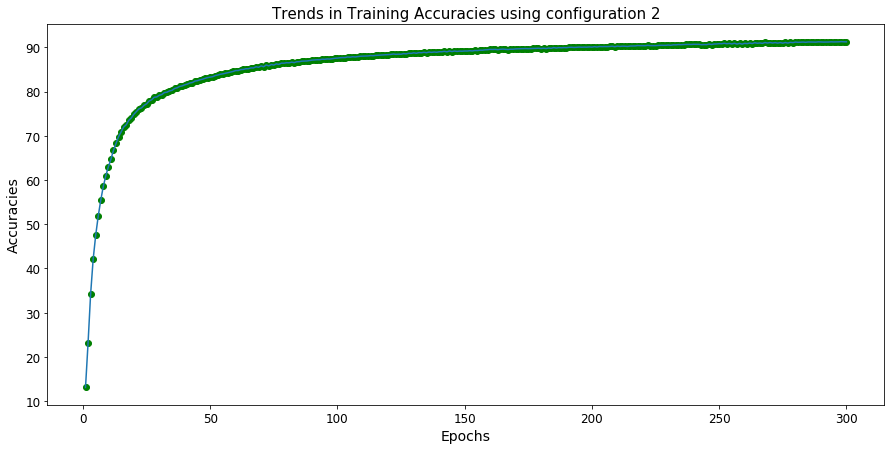

In [37]:
epochs = list(range(1,300+1))
accuracies= li2
plt.figure(figsize=(15,7))
plt.title('Trends in Training Accuracies using configuration 2', fontsize=15)
plt.xlabel('Epochs', size=14)
plt.ylabel('Accuracies', fontsize=14)
plt.tick_params(labelsize=12);
plt.scatter(epochs,accuracies,alpha=1,c='green')
plt.plot(epochs,accuracies)

### Evaluating on Validation data using configuration 2:

In [38]:
labely_test,labelpred=testing(W2,b2,W1,b1,X_testval,y_testval,sigmoid)
accuracy_val=accuracy(labely_test, labelpred)
print("Accuracy on Validation data using configuration 2: {}%".format(accuracy_val))
acc2=accuracy_val

Accuracy on Validation data using configuration 2: 89.77%


In [39]:
acc2

89.77

### Configuration 3 :
* Number of neurons = 128
* Learning rate = 0.01
* Iteratations =300
* Activation Function : Sigmoid

In [40]:
W2,b2,W1,b1,li3,loss3=training(X_trainval,y_trainval,128,0.01,300,sigmoid,sigmoid_derivative)

Epoch 1: training loss = 2.5423745674169833
Training Accuracy after Epoch 1 : 10.63%
Epoch 2: training loss = 2.465350602832063
Training Accuracy after Epoch 2 : 11.19%
Epoch 3: training loss = 2.4016890011110044
Training Accuracy after Epoch 3 : 12.06%
Epoch 4: training loss = 2.3490085849342393
Training Accuracy after Epoch 4 : 13.12%
Epoch 5: training loss = 2.3021859983755366
Training Accuracy after Epoch 5 : 14.57%
Epoch 6: training loss = 2.261455373939182
Training Accuracy after Epoch 6 : 16.2%
Epoch 7: training loss = 2.224786896783511
Training Accuracy after Epoch 7 : 18.07%
Epoch 8: training loss = 2.190686455965526
Training Accuracy after Epoch 8 : 20.12%
Epoch 9: training loss = 2.158894245627258
Training Accuracy after Epoch 9 : 22.35%
Epoch 10: training loss = 2.128904866964476
Training Accuracy after Epoch 10 : 24.44%
Epoch 11: training loss = 2.1013461190918807
Training Accuracy after Epoch 11 : 26.81%
Epoch 12: training loss = 2.075401247538559
Training Accuracy after 

Epoch 96: training loss = 1.2162363075275175
Training Accuracy after Epoch 96 : 77.22%
Epoch 97: training loss = 1.2112344780741413
Training Accuracy after Epoch 97 : 77.33%
Epoch 98: training loss = 1.2062855971735005
Training Accuracy after Epoch 98 : 77.44%
Epoch 99: training loss = 1.2013891988596712
Training Accuracy after Epoch 99 : 77.51%
Epoch 100: training loss = 1.196551830217637
Training Accuracy after Epoch 100 : 77.63%
Epoch 101: training loss = 1.1917712911957667
Training Accuracy after Epoch 101 : 77.75%
Epoch 102: training loss = 1.1870313557622818
Training Accuracy after Epoch 102 : 77.85%
Epoch 103: training loss = 1.1823347448740222
Training Accuracy after Epoch 103 : 77.9%
Epoch 104: training loss = 1.1776831237471843
Training Accuracy after Epoch 104 : 78.01%
Epoch 105: training loss = 1.173065255175428
Training Accuracy after Epoch 105 : 78.13%
Epoch 106: training loss = 1.168489249318083
Training Accuracy after Epoch 106 : 78.23%
Epoch 107: training loss = 1.1639

Epoch 189: training loss = 0.9043900351352635
Training Accuracy after Epoch 189 : 83.08%
Epoch 190: training loss = 0.9021326162253047
Training Accuracy after Epoch 190 : 83.14%
Epoch 191: training loss = 0.8998926502549961
Training Accuracy after Epoch 191 : 83.17%
Epoch 192: training loss = 0.8976678505227018
Training Accuracy after Epoch 192 : 83.21%
Epoch 193: training loss = 0.8954564840342719
Training Accuracy after Epoch 193 : 83.27%
Epoch 194: training loss = 0.8932581654797183
Training Accuracy after Epoch 194 : 83.3%
Epoch 195: training loss = 0.891073049705327
Training Accuracy after Epoch 195 : 83.32%
Epoch 196: training loss = 0.8889010814151428
Training Accuracy after Epoch 196 : 83.37%
Epoch 197: training loss = 0.8867419979016147
Training Accuracy after Epoch 197 : 83.4%
Epoch 198: training loss = 0.8845950939697287
Training Accuracy after Epoch 198 : 83.43%
Epoch 199: training loss = 0.882459288825308
Training Accuracy after Epoch 199 : 83.46%
Epoch 200: training loss 

Epoch 282: training loss = 0.7433151774670324
Training Accuracy after Epoch 282 : 85.54%
Epoch 283: training loss = 0.7419905127941104
Training Accuracy after Epoch 283 : 85.57%
Epoch 284: training loss = 0.740674414016629
Training Accuracy after Epoch 284 : 85.59%
Epoch 285: training loss = 0.7393668173546207
Training Accuracy after Epoch 285 : 85.6%
Epoch 286: training loss = 0.7380671079871894
Training Accuracy after Epoch 286 : 85.63%
Epoch 287: training loss = 0.7367745077941024
Training Accuracy after Epoch 287 : 85.65%
Epoch 288: training loss = 0.7354883463967657
Training Accuracy after Epoch 288 : 85.67%
Epoch 289: training loss = 0.7342081065855486
Training Accuracy after Epoch 289 : 85.7%
Epoch 290: training loss = 0.7329333721559439
Training Accuracy after Epoch 290 : 85.71%
Epoch 291: training loss = 0.7316638235938232
Training Accuracy after Epoch 291 : 85.72%
Epoch 292: training loss = 0.7303993407202826
Training Accuracy after Epoch 292 : 85.75%
Epoch 293: training loss

## Test Loss using configuration 3:

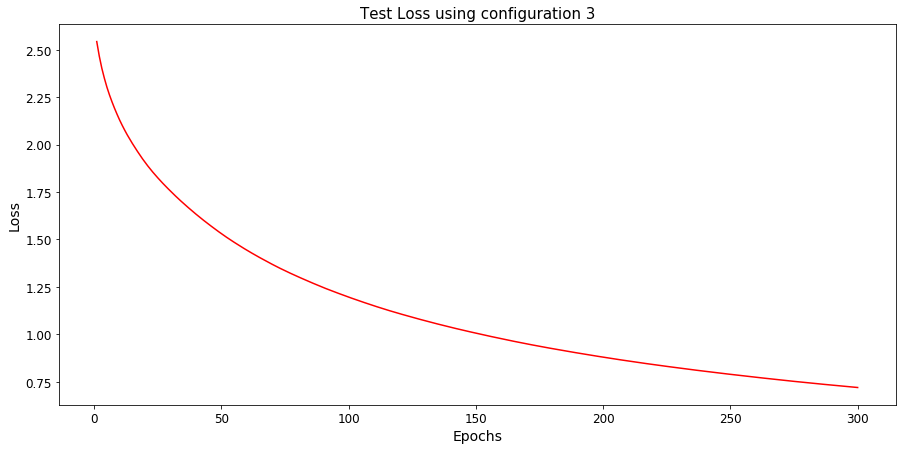

In [41]:
epochs = list(range(1,300+1))
loss= loss3
plt.figure(figsize=(15,7))
plt.title('Test Loss using configuration 3', fontsize=15)
plt.xlabel('Epochs', size=14)
plt.ylabel('Loss', fontsize=14)
plt.tick_params(labelsize=12);
#plt.scatter(epochs,loss,alpha=1,c='green')
plt.plot(epochs,loss,c='red')


### Plotting training accuracies :

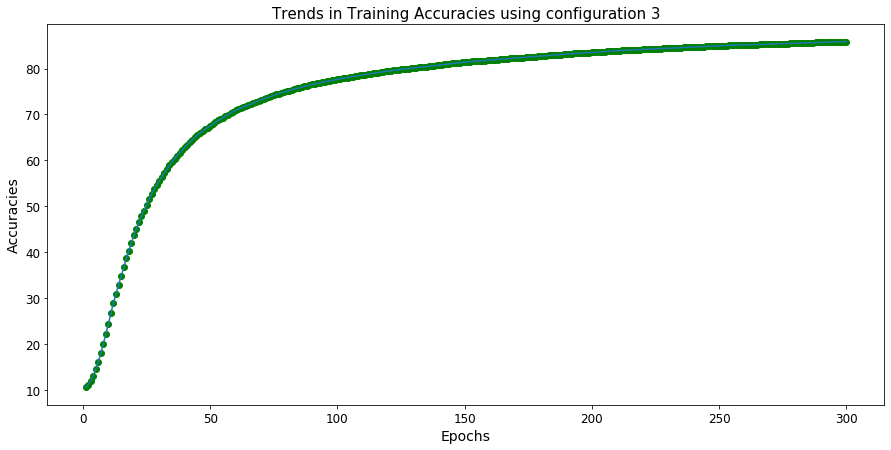

In [42]:
epochs = list(range(1,300+1))
accuracies= li3
plt.figure(figsize=(15,7))
plt.title('Trends in Training Accuracies using configuration 3', fontsize=15)
plt.xlabel('Epochs', size=14)
plt.ylabel('Accuracies', fontsize=14)
plt.tick_params(labelsize=12);
plt.scatter(epochs,accuracies,alpha=1,c='green')
plt.plot(epochs,accuracies)

### Evaluating on Validation data using configuration 3:

In [43]:
labely_test,labelpred=testing(W2,b2,W1,b1,X_testval,y_testval,sigmoid)
accuracy_val=accuracy(labely_test, labelpred)
print("Accuracy on Validation data using configuration 3: {}%".format(accuracy_val))
acc3=accuracy_val

Accuracy on Validation data using configuration 3: 85.11%


### Configuration 4 :
* Number of neurons = 128
* Learning rate = 0.05
* Iteratations =300
* Activation Function : Sigmoid

In [44]:
W2,b2,W1,b1,li4,loss4=training(X_trainval,y_trainval,128,0.01,300,sigmoid,sigmoid_derivative)

Epoch 1: training loss = 2.3319175213860603
Training Accuracy after Epoch 1 : 16.15%
Epoch 2: training loss = 2.291027892399686
Training Accuracy after Epoch 2 : 18.25%
Epoch 3: training loss = 2.2530661813995665
Training Accuracy after Epoch 3 : 20.57%
Epoch 4: training loss = 2.2171379588928537
Training Accuracy after Epoch 4 : 22.79%
Epoch 5: training loss = 2.1838724676477863
Training Accuracy after Epoch 5 : 24.99%
Epoch 6: training loss = 2.1526577229183474
Training Accuracy after Epoch 6 : 26.99%
Epoch 7: training loss = 2.122778725779165
Training Accuracy after Epoch 7 : 29.08%
Epoch 8: training loss = 2.0950344733935187
Training Accuracy after Epoch 8 : 30.84%
Epoch 9: training loss = 2.0685741228677417
Training Accuracy after Epoch 9 : 32.64%
Epoch 10: training loss = 2.0433398155989235
Training Accuracy after Epoch 10 : 34.36%
Epoch 11: training loss = 2.0195028984215138
Training Accuracy after Epoch 11 : 35.91%
Epoch 12: training loss = 1.996484985662768
Training Accuracy a

Epoch 96: training loss = 1.1811480395569234
Training Accuracy after Epoch 96 : 75.67%
Epoch 97: training loss = 1.176690808721814
Training Accuracy after Epoch 97 : 75.78%
Epoch 98: training loss = 1.1722756531754146
Training Accuracy after Epoch 98 : 75.89%
Epoch 99: training loss = 1.1678969624466393
Training Accuracy after Epoch 99 : 75.99%
Epoch 100: training loss = 1.163555457570635
Training Accuracy after Epoch 100 : 76.12%
Epoch 101: training loss = 1.1592532960209092
Training Accuracy after Epoch 101 : 76.25%
Epoch 102: training loss = 1.1549799135356722
Training Accuracy after Epoch 102 : 76.4%
Epoch 103: training loss = 1.1507262724696572
Training Accuracy after Epoch 103 : 76.5%
Epoch 104: training loss = 1.1464914399464456
Training Accuracy after Epoch 104 : 76.63%
Epoch 105: training loss = 1.142276222633638
Training Accuracy after Epoch 105 : 76.77%
Epoch 106: training loss = 1.1380838725224096
Training Accuracy after Epoch 106 : 76.9%
Epoch 107: training loss = 1.133920

Epoch 189: training loss = 0.8974762105943076
Training Accuracy after Epoch 189 : 82.27%
Epoch 190: training loss = 0.8953645180601255
Training Accuracy after Epoch 190 : 82.3%
Epoch 191: training loss = 0.8932659784635847
Training Accuracy after Epoch 191 : 82.33%
Epoch 192: training loss = 0.8911811767497949
Training Accuracy after Epoch 192 : 82.38%
Epoch 193: training loss = 0.8891096382462217
Training Accuracy after Epoch 193 : 82.42%
Epoch 194: training loss = 0.8870519727924275
Training Accuracy after Epoch 194 : 82.45%
Epoch 195: training loss = 0.8850085547224149
Training Accuracy after Epoch 195 : 82.48%
Epoch 196: training loss = 0.8829773217861493
Training Accuracy after Epoch 196 : 82.54%
Epoch 197: training loss = 0.8809551041112323
Training Accuracy after Epoch 197 : 82.57%
Epoch 198: training loss = 0.8789397080796334
Training Accuracy after Epoch 198 : 82.63%
Epoch 199: training loss = 0.8769309368360151
Training Accuracy after Epoch 199 : 82.66%
Epoch 200: training lo

Epoch 282: training loss = 0.7446011969204872
Training Accuracy after Epoch 282 : 85.11%
Epoch 283: training loss = 0.7433454410847211
Training Accuracy after Epoch 283 : 85.13%
Epoch 284: training loss = 0.7420961224662754
Training Accuracy after Epoch 284 : 85.17%
Epoch 285: training loss = 0.7408526573576903
Training Accuracy after Epoch 285 : 85.18%
Epoch 286: training loss = 0.7396146224489513
Training Accuracy after Epoch 286 : 85.21%
Epoch 287: training loss = 0.7383819681755479
Training Accuracy after Epoch 287 : 85.22%
Epoch 288: training loss = 0.737154815097457
Training Accuracy after Epoch 288 : 85.22%
Epoch 289: training loss = 0.7359331039331516
Training Accuracy after Epoch 289 : 85.24%
Epoch 290: training loss = 0.7347165420521683
Training Accuracy after Epoch 290 : 85.27%
Epoch 291: training loss = 0.7335047439771121
Training Accuracy after Epoch 291 : 85.29%
Epoch 292: training loss = 0.7322973806776056
Training Accuracy after Epoch 292 : 85.32%
Epoch 293: training lo

## Test Loss using configuration 4:

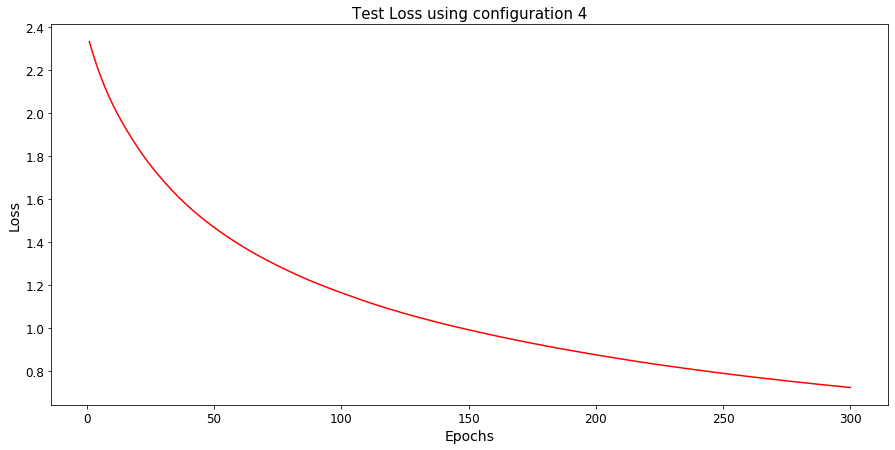

In [45]:
epochs = list(range(1,300+1))
loss= loss4
plt.figure(figsize=(15,7))
plt.title('Test Loss using configuration 4', fontsize=15)
plt.xlabel('Epochs', size=14)
plt.ylabel('Loss', fontsize=14)
plt.tick_params(labelsize=12);
#plt.scatter(epochs,loss,alpha=1,c='green')
plt.plot(epochs,loss,c='red')


### Plotting training accuracies :

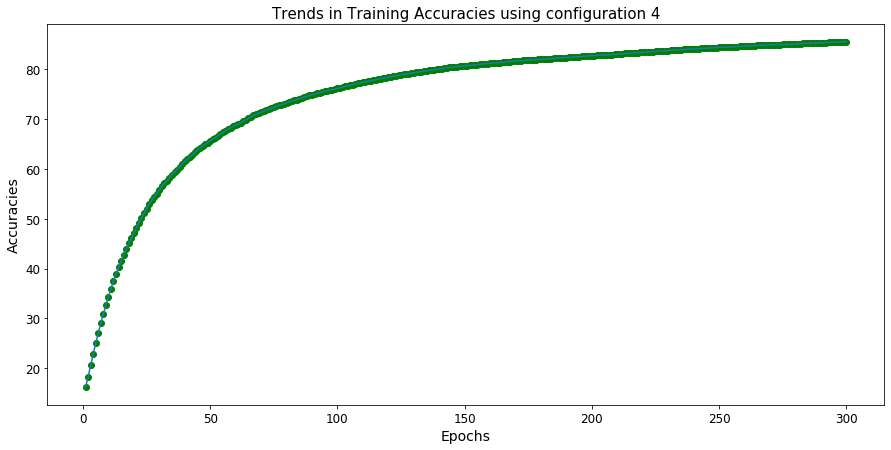

In [46]:
epochs = list(range(1,300+1))
accuracies= li4
plt.figure(figsize=(15,7))
plt.title('Trends in Training Accuracies using configuration 4', fontsize=15)
plt.xlabel('Epochs', size=14)
plt.ylabel('Accuracies', fontsize=14)
plt.tick_params(labelsize=12);
plt.scatter(epochs,accuracies,alpha=1,c='green')
plt.plot(epochs,accuracies)

### Evaluating on Validation data using configuration 4:

In [47]:
labely_test,labelpred=testing(W2,b2,W1,b1,X_testval,y_testval,sigmoid)
accuracy_val=accuracy(labely_test, labelpred)
print("Accuracy on Validation data using configuration 4: {}%".format(accuracy_val))
acc4=accuracy_val

Accuracy on Validation data using configuration 4: 84.52%


### Configuration 5 :
* Number of neurons = 64
* Learning rate = 0.05
* Iteratations =300
* Activation Function : tanh

In [48]:
W2,b2,W1,b1,li5,loss5=training(X_trainval,y_trainval,64,0.05,300,tanh, tanh_derivative)

Epoch 1: training loss = 2.143109777134799
Training Accuracy after Epoch 1 : 25.35%
Epoch 2: training loss = 1.8386783364211532
Training Accuracy after Epoch 2 : 37.86%
Epoch 3: training loss = 1.6509458922235274
Training Accuracy after Epoch 3 : 48.24%
Epoch 4: training loss = 1.5116580903386718
Training Accuracy after Epoch 4 : 54.54%
Epoch 5: training loss = 1.404966369592228
Training Accuracy after Epoch 5 : 59.49%
Epoch 6: training loss = 1.3142566159431113
Training Accuracy after Epoch 6 : 62.89%
Epoch 7: training loss = 1.240311514679225
Training Accuracy after Epoch 7 : 66.08%
Epoch 8: training loss = 1.1793960249598174
Training Accuracy after Epoch 8 : 68.21%
Epoch 9: training loss = 1.1249061826675846
Training Accuracy after Epoch 9 : 70.08%
Epoch 10: training loss = 1.076753488495218
Training Accuracy after Epoch 10 : 71.52%
Epoch 11: training loss = 1.0352176309392407
Training Accuracy after Epoch 11 : 73.0%
Epoch 12: training loss = 0.996779498681594
Training Accuracy afte

Epoch 96: training loss = 0.4040230085545427
Training Accuracy after Epoch 96 : 89.71%
Epoch 97: training loss = 0.40321415142333694
Training Accuracy after Epoch 97 : 89.66%
Epoch 98: training loss = 0.39986582262253756
Training Accuracy after Epoch 98 : 89.81%
Epoch 99: training loss = 0.4000476164977872
Training Accuracy after Epoch 99 : 89.77%
Epoch 100: training loss = 0.39902279768825716
Training Accuracy after Epoch 100 : 89.72%
Epoch 101: training loss = 0.3969178605677258
Training Accuracy after Epoch 101 : 89.76%
Epoch 102: training loss = 0.3951388578811072
Training Accuracy after Epoch 102 : 89.9%
Epoch 103: training loss = 0.3940214437887119
Training Accuracy after Epoch 103 : 89.9%
Epoch 104: training loss = 0.38952151062074014
Training Accuracy after Epoch 104 : 90.0%
Epoch 105: training loss = 0.38781712330409235
Training Accuracy after Epoch 105 : 90.09%
Epoch 106: training loss = 0.38811709097293945
Training Accuracy after Epoch 106 : 89.99%
Epoch 107: training loss =

Epoch 188: training loss = 0.31054114616341233
Training Accuracy after Epoch 188 : 91.64%
Epoch 189: training loss = 0.3067517822477562
Training Accuracy after Epoch 189 : 91.86%
Epoch 190: training loss = 0.3091824536079278
Training Accuracy after Epoch 190 : 91.69%
Epoch 191: training loss = 0.3078034473536833
Training Accuracy after Epoch 191 : 91.96%
Epoch 192: training loss = 0.3039878622886316
Training Accuracy after Epoch 192 : 91.92%
Epoch 193: training loss = 0.3021054305971492
Training Accuracy after Epoch 193 : 92.1%
Epoch 194: training loss = 0.30429053537806694
Training Accuracy after Epoch 194 : 91.96%
Epoch 195: training loss = 0.2989725157910637
Training Accuracy after Epoch 195 : 92.1%
Epoch 196: training loss = 0.29981138109574085
Training Accuracy after Epoch 196 : 92.05%
Epoch 197: training loss = 0.30229232898840086
Training Accuracy after Epoch 197 : 91.93%
Epoch 198: training loss = 0.3007216622298837
Training Accuracy after Epoch 198 : 92.06%
Epoch 199: training

Epoch 280: training loss = 0.26067958783040013
Training Accuracy after Epoch 280 : 93.06%
Epoch 281: training loss = 0.2612890652870424
Training Accuracy after Epoch 281 : 92.95%
Epoch 282: training loss = 0.2603933407420769
Training Accuracy after Epoch 282 : 93.05%
Epoch 283: training loss = 0.2579592712698576
Training Accuracy after Epoch 283 : 93.15%
Epoch 284: training loss = 0.2596073209485722
Training Accuracy after Epoch 284 : 93.05%
Epoch 285: training loss = 0.25929802221366766
Training Accuracy after Epoch 285 : 92.94%
Epoch 286: training loss = 0.26212984729478367
Training Accuracy after Epoch 286 : 92.96%
Epoch 287: training loss = 0.25981001850916025
Training Accuracy after Epoch 287 : 93.0%
Epoch 288: training loss = 0.2590806638356177
Training Accuracy after Epoch 288 : 93.07%
Epoch 289: training loss = 0.25785391357106685
Training Accuracy after Epoch 289 : 93.19%
Epoch 290: training loss = 0.2559784408859044
Training Accuracy after Epoch 290 : 93.13%
Epoch 291: traini

### Test loss using Configuration 5:

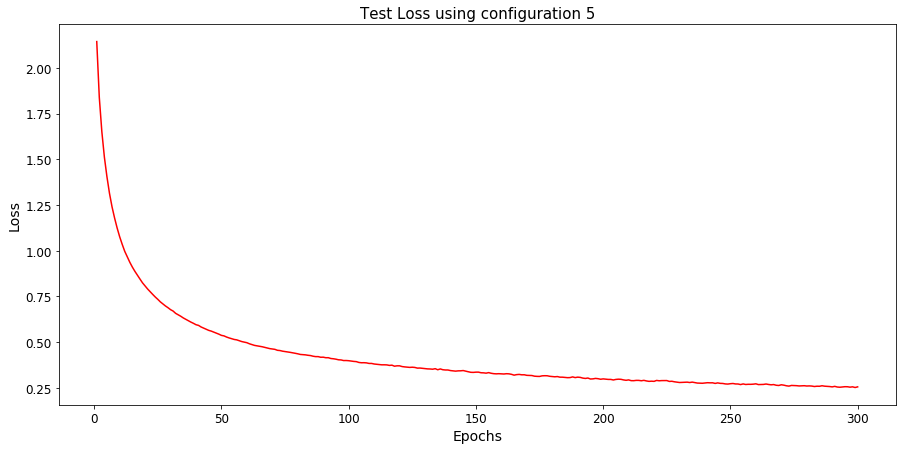

In [49]:
epochs = list(range(1,300+1))
loss= loss5
plt.figure(figsize=(15,7))
plt.title('Test Loss using configuration 5', fontsize=15)
plt.xlabel('Epochs', size=14)
plt.ylabel('Loss', fontsize=14)
plt.tick_params(labelsize=12);
#plt.scatter(epochs,loss,alpha=1,c='green')
plt.plot(epochs,loss,c='red')

### Plotting Training Accuracies:

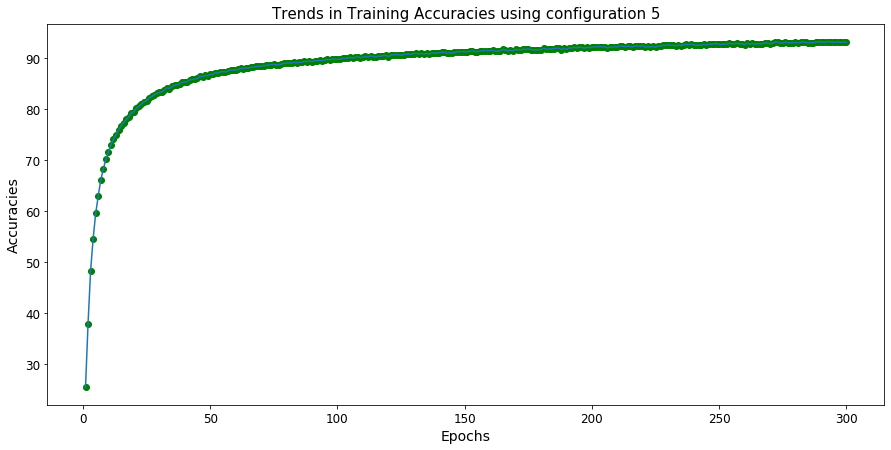

In [50]:
epochs = list(range(1,300+1))
accuracies= li5
plt.figure(figsize=(15,7))
plt.title('Trends in Training Accuracies using configuration 5', fontsize=15)
plt.xlabel('Epochs', size=14)
plt.ylabel('Accuracies', fontsize=14)
plt.tick_params(labelsize=12);
plt.scatter(epochs,accuracies,alpha=1,c='green')
plt.plot(epochs,accuracies)

### Evaluating on Validation Test data using Configuration 5 :

In [51]:
labely_test,labelpred=testing(W2,b2,W1,b1,X_testval,y_testval,tanh)
accuracy_val=accuracy(labely_test, labelpred)
print("Accuracy on Validation data using configuration 5: {}%".format(accuracy_val))
acc5=accuracy_val

Accuracy on Validation data using configuration 5: 91.25%


## Compiling the training accuracy observations as a whole :

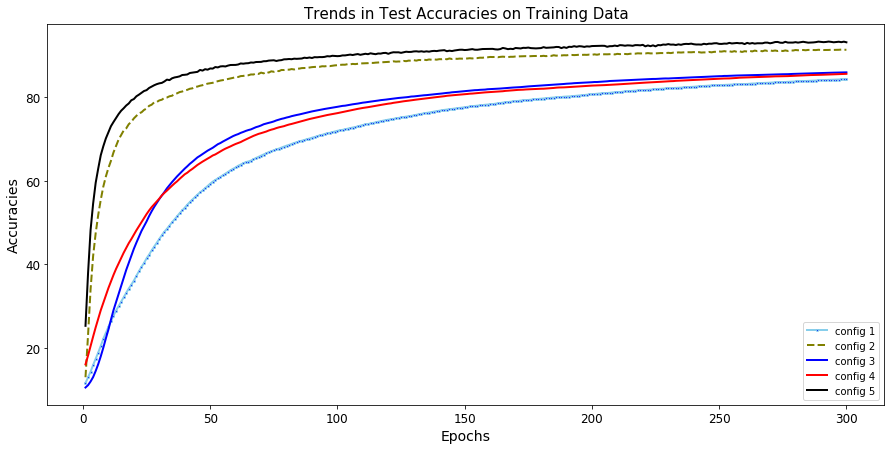

In [52]:
plt.figure(figsize=(15,7))
plt.title('Trends in Test Accuracies on Training Data', fontsize=15)
plt.xlabel('Epochs', size=14)
plt.ylabel('Accuracies', fontsize=14)
plt.tick_params(labelsize=12);
plt.plot( epochs,li1, marker='o', markerfacecolor='blue', markersize=2, color='skyblue', linewidth=2, label="config 1")
plt.plot( epochs,li2, marker='', color='olive', linewidth=2,linestyle='dashed', label="config 2")
plt.plot(epochs,li3, marker='', color='blue', linewidth=2, label="config 3")
plt.plot(epochs,li4, marker='', color='red', linewidth=2, label="config 4")
plt.plot(epochs,li5, marker='', color='black', linewidth=2, label="config 5")
plt.legend()

* Here we can see that when used configuration 5, the model gives highest accuracy of predictions. We can see a steep curve with slight disturbances, converging to an optimal solution.

## Compiling the training loss observations as a whole :

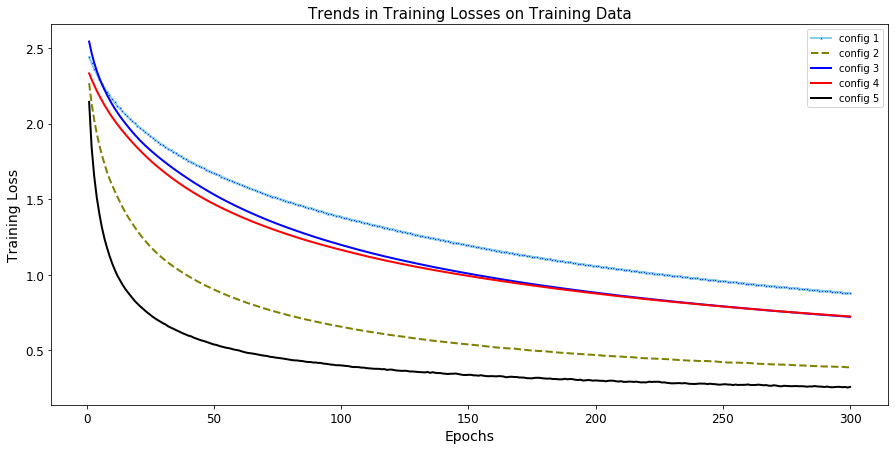

In [53]:
plt.figure(figsize=(15,7))
plt.title('Trends in Training Losses on Training Data', fontsize=15)
plt.xlabel('Epochs', size=14)
plt.ylabel('Training Loss', fontsize=14)
plt.tick_params(labelsize=12);
plt.plot( epochs,loss1, marker='o', markerfacecolor='blue', markersize=2, color='skyblue', linewidth=2, label="config 1")
plt.plot( epochs,loss2, marker='', color='olive', linewidth=2,linestyle='dashed', label="config 2")
plt.plot(epochs,loss3, marker='', color='blue', linewidth=2, label="config 3")
plt.plot(epochs,loss4, marker='', color='red', linewidth=2, label="config 4")
plt.plot(epochs,loss5, marker='', color='black', linewidth=2, label="config 5")
plt.legend()

* Here we can see a significant decrease in training loss when used configuration 5, notice the steep curve.

## Plotting Test accuracies with different learning rates:

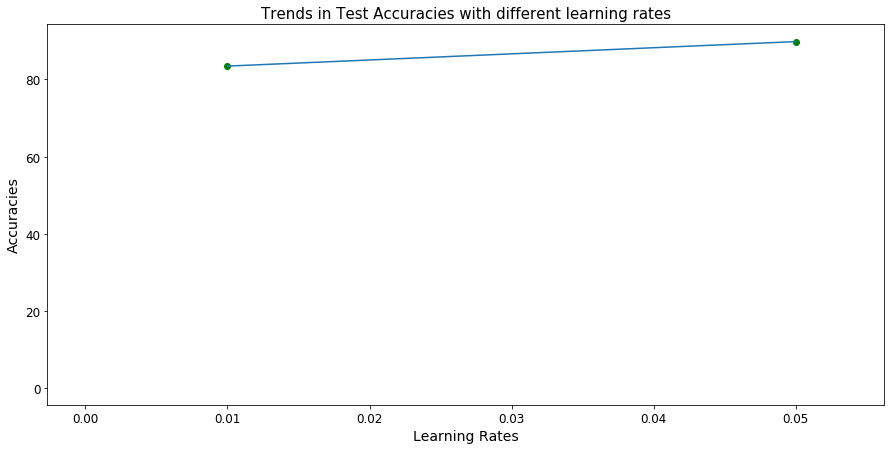

In [54]:
learning_rate=[0.01,0.05]
accuracies=[acc1,acc2]
plt.figure(figsize=(15,7))
width=0.25
plt.title('Trends in Test Accuracies with different learning rates', fontsize=15)
plt.xlabel('Learning Rates', size=14)
plt.ylabel('Accuracies', fontsize=14)
plt.tick_params(labelsize=12);
plt.scatter(learning_rate,accuracies,alpha=1,c='green')
plt.plot(learning_rate,accuracies,width)

* Here when I increased the learning rate from 0.01 to 0.05 keeping number of neurons same i.e 64, I observed a noticeable increase in accuracy. 

## Plotting Test accuracies with different number of neurons :

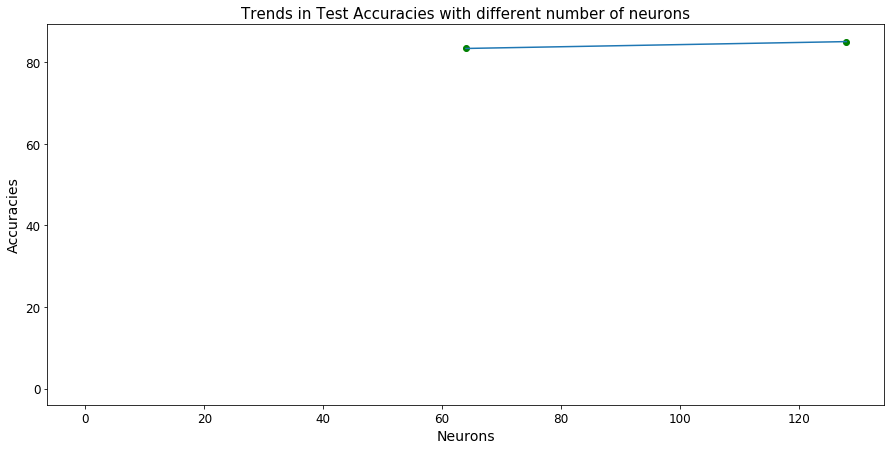

In [55]:
neurons=[64,128]
accuracies=[acc1,acc3]
plt.figure(figsize=(15,7))
width=0.25
plt.title('Trends in Test Accuracies with different number of neurons', fontsize=15)
plt.xlabel('Neurons', size=14)
plt.ylabel('Accuracies', fontsize=14)
plt.tick_params(labelsize=12);
plt.scatter(neurons,accuracies,alpha=1,c='green')
plt.plot(neurons,accuracies,width)

* Here when I increased the number of neurons from 64 to 128 keeping learning rate = 0.01, I observed and slight increase in the accuracy.

In [56]:
acc2,acc5

(89.77, 91.25)

## Plotting Test accuracies using different activation functions :

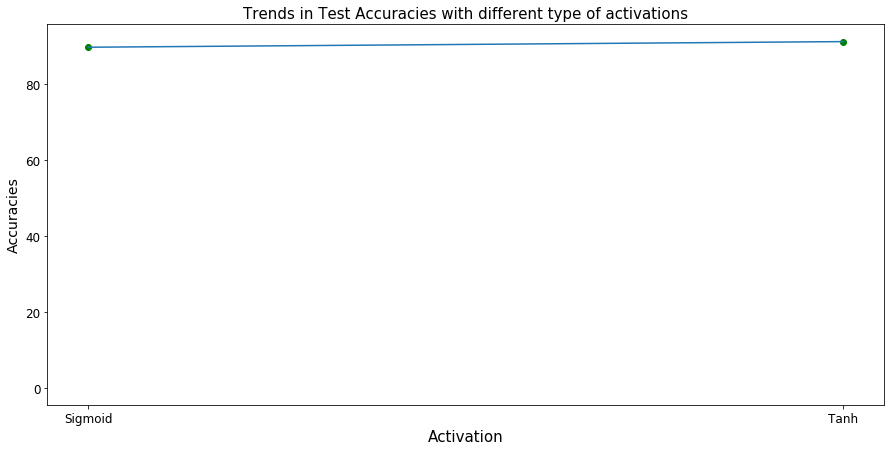

In [57]:
activation =['Sigmoid','Tanh']
accuracies=[acc2,acc5]
plt.figure(figsize=(15,7))
width=0.25
plt.title('Trends in Test Accuracies with different type of activations', fontsize=15)
plt.xlabel('Activation', size=15)
plt.ylabel('Accuracies', fontsize=14)
plt.tick_params(labelsize=12);
plt.scatter(activation,accuracies,alpha=1,c='green')
plt.plot(activation,accuracies,width)

* Here we can see a noticeable increase in model performance when we used Tanh activation function.Tanh curve is steeper than the sigmoid curve, one of the reasons it helps the algorithm to converge is less number of epochs than sigmoid. 

## Plot to see trends in accuracies over all configurations :

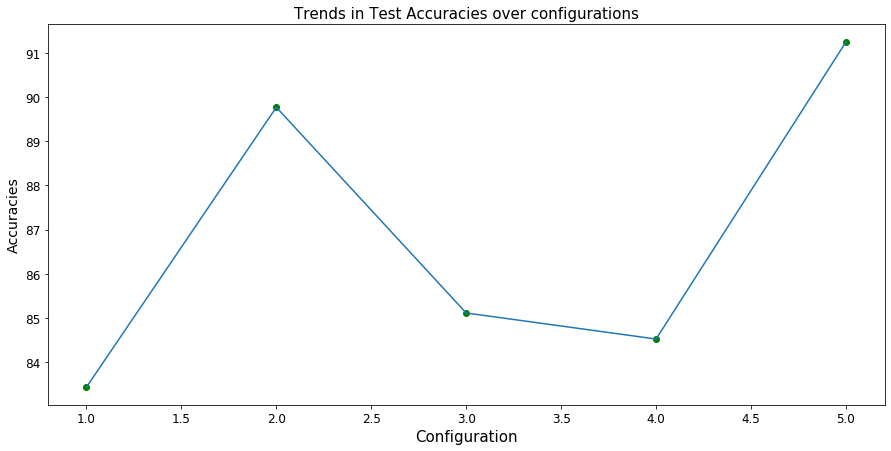

In [58]:
configurations = [1,2,3,4,5]
accuracies= [acc1,acc2,acc3,acc4,acc5]
plt.figure(figsize=(15,7))
plt.title('Trends in Test Accuracies over configurations', fontsize=15)
plt.xlabel('Configuration', size=15)
plt.ylabel('Accuracies', fontsize=14)
plt.tick_params(labelsize=12);
plt.scatter(configurations,accuracies,alpha=1,c='green')
plt.plot(configurations,accuracies)


* Here we can see after taking into account all the results obtained using all possible configurations by tweaking Learning rates and number of  and type of non-linerity activation function in the hidden layer, we observed that our model performed very well when we used configurations 2 and 5. Hence we will be using the best configuration out of the two that is configuration 5 on our model to achieve good results.

## Convergence Criteria :
* For each configuration, the Testing function simply takes the updated weights retrieved from training function and runs our model on validation data thus returning probabilities of class labels. 
* Further, accuracy is calculated on validation data. I have tuned my weight parameters for 300 epochs and then tested my model since after 300th epoch, it was observed that the although the training accuracy was gradually increasing, the model showed almost no improvement in performance and no decrease in loss, that is, it has reached the point of convergence. 
 

# Question 4 :
* After evaluating our model on Validation dataset using 4 configurations we will be training our model using the best configuration that is configuration 5 on our entire original Training dataset of 60,000 samples. Furthermore, we will evaluate our model on original Test data consisting of 10,000 samples.

## Final Configuration Used :
* Number of neurons = 64
* Learning rate = 0.05
* Iteratations =300
* Activation Function : tanh

### Training our model using Configuration 5 on Entire Training Data :

In [59]:
X_train.shape, y_test.shape

((60000, 784), (10000,))

In [60]:
W2,b2,W1,b1,accu_train,losstrain=training(X_train,y_train,64,0.05,300,tanh,tanh_derivative)

Epoch 1: training loss = 2.1237241860151843
Training Accuracy after Epoch 1 : 24.34%
Epoch 2: training loss = 1.7741028753604693
Training Accuracy after Epoch 2 : 40.86%
Epoch 3: training loss = 1.5646773545530452
Training Accuracy after Epoch 3 : 50.75%
Epoch 4: training loss = 1.4059631366403973
Training Accuracy after Epoch 4 : 57.99%
Epoch 5: training loss = 1.2848628680074188
Training Accuracy after Epoch 5 : 62.41%
Epoch 6: training loss = 1.198521806814933
Training Accuracy after Epoch 6 : 66.17%
Epoch 7: training loss = 1.125657209159763
Training Accuracy after Epoch 7 : 68.78%
Epoch 8: training loss = 1.0684037047699464
Training Accuracy after Epoch 8 : 70.9%
Epoch 9: training loss = 1.018807481407714
Training Accuracy after Epoch 9 : 72.46%
Epoch 10: training loss = 0.9789955205144311
Training Accuracy after Epoch 10 : 74.15%
Epoch 11: training loss = 0.9451255761709619
Training Accuracy after Epoch 11 : 74.97%
Epoch 12: training loss = 0.9086567915002225
Training Accuracy af

Epoch 96: training loss = 0.39225017448553773
Training Accuracy after Epoch 96 : 90.03%
Epoch 97: training loss = 0.39074207455522825
Training Accuracy after Epoch 97 : 89.99%
Epoch 98: training loss = 0.3891097769772502
Training Accuracy after Epoch 98 : 90.04%
Epoch 99: training loss = 0.38737074521522047
Training Accuracy after Epoch 99 : 90.13%
Epoch 100: training loss = 0.3848028850103189
Training Accuracy after Epoch 100 : 90.21%
Epoch 101: training loss = 0.3848650444421271
Training Accuracy after Epoch 101 : 90.18%
Epoch 102: training loss = 0.3834067700715851
Training Accuracy after Epoch 102 : 90.28%
Epoch 103: training loss = 0.38072488794721376
Training Accuracy after Epoch 103 : 90.33%
Epoch 104: training loss = 0.37785682292799433
Training Accuracy after Epoch 104 : 90.35%
Epoch 105: training loss = 0.37714727225320166
Training Accuracy after Epoch 105 : 90.38%
Epoch 106: training loss = 0.3772257000245325
Training Accuracy after Epoch 106 : 90.29%
Epoch 107: training los

Epoch 188: training loss = 0.3047374750135563
Training Accuracy after Epoch 188 : 91.91%
Epoch 189: training loss = 0.30413017862318154
Training Accuracy after Epoch 189 : 91.98%
Epoch 190: training loss = 0.3063380278084302
Training Accuracy after Epoch 190 : 91.84%
Epoch 191: training loss = 0.3053240025349232
Training Accuracy after Epoch 191 : 91.92%
Epoch 192: training loss = 0.303152265989599
Training Accuracy after Epoch 192 : 91.97%
Epoch 193: training loss = 0.3011641683069236
Training Accuracy after Epoch 193 : 92.04%
Epoch 194: training loss = 0.3015973723237824
Training Accuracy after Epoch 194 : 91.97%
Epoch 195: training loss = 0.3020595406452676
Training Accuracy after Epoch 195 : 92.06%
Epoch 196: training loss = 0.3013781737546008
Training Accuracy after Epoch 196 : 91.98%
Epoch 197: training loss = 0.3019939412602581
Training Accuracy after Epoch 197 : 91.98%
Epoch 198: training loss = 0.3003652814563829
Training Accuracy after Epoch 198 : 92.05%
Epoch 199: training l

Epoch 280: training loss = 0.2680285951046872
Training Accuracy after Epoch 280 : 92.77%
Epoch 281: training loss = 0.26923647316843186
Training Accuracy after Epoch 281 : 92.66%
Epoch 282: training loss = 0.26775348076557476
Training Accuracy after Epoch 282 : 92.82%
Epoch 283: training loss = 0.2675496438006737
Training Accuracy after Epoch 283 : 92.77%
Epoch 284: training loss = 0.26472402421685287
Training Accuracy after Epoch 284 : 92.91%
Epoch 285: training loss = 0.2627686961738097
Training Accuracy after Epoch 285 : 92.96%
Epoch 286: training loss = 0.25991398305549873
Training Accuracy after Epoch 286 : 93.08%
Epoch 287: training loss = 0.26106299914199
Training Accuracy after Epoch 287 : 93.01%
Epoch 288: training loss = 0.2618141806706811
Training Accuracy after Epoch 288 : 92.93%
Epoch 289: training loss = 0.2633749726995195
Training Accuracy after Epoch 289 : 92.91%
Epoch 290: training loss = 0.26216664639567905
Training Accuracy after Epoch 290 : 92.96%
Epoch 291: trainin

### Test Loss:

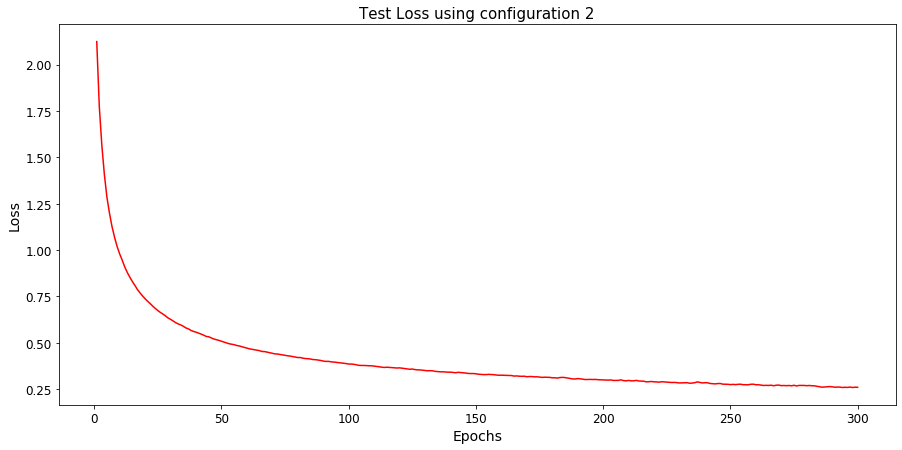

In [61]:
epochs = list(range(1,300+1))
loss= losstrain
plt.figure(figsize=(15,7))
plt.title('Test Loss using configuration 2', fontsize=15)
plt.xlabel('Epochs', size=14)
plt.ylabel('Loss', fontsize=14)
plt.tick_params(labelsize=12);
#plt.scatter(epochs,loss,alpha=1,c='green')
plt.plot(epochs,loss,c='red')


* Here we can see that the loss is decreasing gradually, that is our model is learning by taking into consideration the loss at after each iteration, and then computing the change in loss w.r.t weights. This gradient information is computed and back propogated to the hidden layers and input layer. Using this information, weights are updated again and these weights are used in feed forward network for the next iteration. In this way our model learns from the loss obtained after each epoch so that it performs better in the next epoch thus significantly reducing the loss and increasing performance of our model. 

### Plotting Training Accuracies :

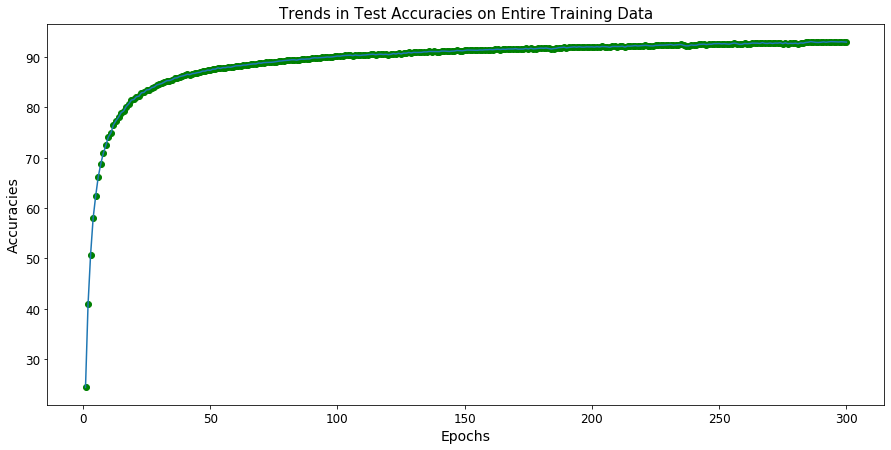

In [62]:
epochs = list(range(1,300+1))
accuracies= accu_train
plt.figure(figsize=(15,7))
plt.title('Trends in Test Accuracies on Entire Training Data', fontsize=15)
plt.xlabel('Epochs', size=14)
plt.ylabel('Accuracies', fontsize=14)
plt.tick_params(labelsize=12);
plt.scatter(epochs,accuracies,alpha=1,c='green')
plt.plot(epochs,accuracies)

* Here we can see a significant increase in our training accuracies using tanh activation function.Tanh curve is steeper than the sigmoid curve, one of the reasons it helps the algorithm to converge is less number of epochs than sigmoid. 

### Evaluating on Entire Test data :

In [63]:
labely_test,labelpred=testing(W2,b2,W1,b1,X_test,y_test,tanh)
accuracy_val=accuracy(labely_test, labelpred)
print("Accuracy on Entire Testing data using configuration 5: {}%".format(accuracy_val))

Accuracy on Entire Testing data using configuration 5: 91.68%


* We can see here that our model has performed significantly well on our Test data with a 91.3% accuracy. As our algorithm steps in further iterations, it's loss gradually decreases compared to the initial iterations where we can see a noticeable increase in accuracy and decrease in loss. With a 0.05 learning rate, slowly our algorithm tries to converge to a better solution. 

## Code Explanation :

* Here I have implemented a Multiclass Neural Network classifier with one hidden layer. I have used idx2numpy library to convert the input file into a numpy array for conveneince. I reshaped the original training and testing data of dimensions (60,000 * 28 * 28) into 2D numpy array 60000 * 784. I have split the original Training data in ratio 70: 30 into training and validation data for Q3. 
* Each of the inputs will be connected with each of the following layer hidden neurons and will have an associated weight with it. Further each of the neurons in the hidden layer will be connected to each of the output layer neurons/class labels. Hence, I have initialized random weights and first set the bias to zero.
* In the training function, our model will learn based on our training data. First, weights and bias will be initialized. Then in Feed Forward function we simply take the weights and bias and each of our input instances and compute the dot product of each feature vector in input data with all the weight vectors and add bias. 
* This outcome is passed through a non-linearity activation function. Here I have used two functions, Sigmoid and Tanh. This intermediate output is then carried forward in our network.
* This intermediate output acting as input for the next layer, i.e the output layer. Dot product of this intermediate output with new weight vectors will be computed along with adding bias. The final outcome at the output layer will be then passed through another non-linearity activation function called as Softmax function which squeezes all the outcomes between 0 and 1 such that they all add up to 1. Hence what we receive is 10 probabilites for each instance which implies the probabilites that the input instance belongs to the class labels.
* Loss is computed at each epoch using Cross entropy loss since it is used to deal with computing losses of outcomes that are in the form of probabilites. Backpropogation function calculates loss i.e error of each predicted output, and then computes the change in loss with respect to weights at each layer(gradient). This gradient information is sent back to the hidden layers so that the weights can get updated using Update Weights function for the next run. 
* Accuracy for each epoch is calculated by comparing argmax of each output vector (which is our corresponding class label) and the true class labels. 
* In such way, our model keeps learning from the loss gradually, and we notice an increase in accuracy for training data.
* Using each of the mentioned configurations ,we evaluate our model on validation data to check which configuration gives a better performance of our model. 
* Hence I used the best configuration, 5th configuration and using this one, I trained my model using the entire training data 60000 instances and then evaluated it on my test data having 10,000 images and noted accuracy.

<div style="text-align: center">
 
# PERCEPTRON  <br>
</div>
<div style="text-align: justify">

Here my baseline model is my previous implementation of Single layer Multiclass Perceptron to compare its performance with current Neural Network Classifier.

### Function to prepend 1 to input data for bias term :

In [64]:
def add_ones(X): 
    return np.hstack((np.ones((X.shape[0], 1),dtype=int), X)) 

In [65]:
X_train=add_ones(X_train)
X_test=add_ones(X_test)
X_train.shape, X_test.shape

((60000, 785), (10000, 785))

## Training Function :

In [66]:

    def training(X_train, y_train):
        
        dotprod=np.ndarray(10,dtype=np.float32)
        weights=np.zeros((10,X_train.shape[1]), dtype=np.float32)
        iterations=300                           # Number of epochs
        alpha=0.05                              # Learning Rate
        accu=[]
        co=[]
        for iter in range(iterations) : 
            count=0
            for i in range(X_train.shape[0]): # iterating through each feature vector
                for j in range(10):     # weight vectors equivalent to 10 class labels 
                    dotprod[j] = np.dot(X_train[i],weights[j])
        
                ind=y_train[i]                 # true class label
                maxi=np.argmax(dotprod,axis=None)
                y_pred=maxi             # got predicted corresponding class label
       
                if(y_pred!=y_train[i]):
                #subtracting x input from old weight vector coress to predicted label 
                    weights[maxi] -= alpha*X_train[i]
                  
                #adding x input to old weight vector coress to true label 
                    weights[ind] += alpha*X_train[i]
                    
                elif(y_pred==y_train[i]):
                    count=count+1
                    
            accuracy = round(((count/y_train.shape[0])*100), 2)
            print("Accuracy after epoch "+ str(iter)  + " is : ",accuracy)
            accu.append(accuracy)
            #print("Count of correctly classified samples is : " , count)
            co.append(count)
            
        #zippedList =  list(zip(accu,co))
        #df=pd.DataFrame(zippedList, columns = ['Accuracy in %', 'Correctly_classified_samples'],index=None)
        #print(df)
 
        return weights

## Testing Function :

In [70]:
    def testing(X_test,w):
        
        ypred=[]
        activ=[]
        activ=np.dot(X_test,w.T)     #calculating activation
        
        for i in range(activ.shape[0]):
            ypred.append(np.argmax(activ[i]))

        return ypred           #predicted class label

In [87]:
y_trainnew.shape, X_train.shape

((60000,), (60000, 784))

In [88]:
w=training(X_train, y_trainnew)  #got updated weights

Accuracy after epoch 0 is :  85.51
Accuracy after epoch 1 is :  87.58
Accuracy after epoch 2 is :  88.06
Accuracy after epoch 3 is :  88.34
Accuracy after epoch 4 is :  88.53
Accuracy after epoch 5 is :  88.66
Accuracy after epoch 6 is :  88.68
Accuracy after epoch 7 is :  88.66
Accuracy after epoch 8 is :  88.75
Accuracy after epoch 9 is :  88.83
Accuracy after epoch 10 is :  89.01
Accuracy after epoch 11 is :  88.95
Accuracy after epoch 12 is :  89.03
Accuracy after epoch 13 is :  89.11
Accuracy after epoch 14 is :  88.98
Accuracy after epoch 15 is :  89.14
Accuracy after epoch 16 is :  89.14
Accuracy after epoch 17 is :  89.19
Accuracy after epoch 18 is :  89.18
Accuracy after epoch 19 is :  89.22
Accuracy after epoch 20 is :  89.23
Accuracy after epoch 21 is :  89.3
Accuracy after epoch 22 is :  89.22
Accuracy after epoch 23 is :  89.35
Accuracy after epoch 24 is :  89.25
Accuracy after epoch 25 is :  89.25
Accuracy after epoch 26 is :  89.37
Accuracy after epoch 27 is :  89.42
Acc

Accuracy after epoch 225 is :  89.98
Accuracy after epoch 226 is :  89.8
Accuracy after epoch 227 is :  90.11
Accuracy after epoch 228 is :  89.95
Accuracy after epoch 229 is :  89.87
Accuracy after epoch 230 is :  89.95
Accuracy after epoch 231 is :  89.96
Accuracy after epoch 232 is :  89.8
Accuracy after epoch 233 is :  89.98
Accuracy after epoch 234 is :  89.9
Accuracy after epoch 235 is :  89.93
Accuracy after epoch 236 is :  89.94
Accuracy after epoch 237 is :  89.88
Accuracy after epoch 238 is :  90.03
Accuracy after epoch 239 is :  89.91
Accuracy after epoch 240 is :  89.9
Accuracy after epoch 241 is :  89.85
Accuracy after epoch 242 is :  90.0
Accuracy after epoch 243 is :  90.04
Accuracy after epoch 244 is :  89.85
Accuracy after epoch 245 is :  90.05
Accuracy after epoch 246 is :  89.9
Accuracy after epoch 247 is :  89.93
Accuracy after epoch 248 is :  89.92
Accuracy after epoch 249 is :  89.88
Accuracy after epoch 250 is :  89.95
Accuracy after epoch 251 is :  89.89
Accurac

### Accuracy Calculation for Training Data:

In [89]:
predictions_for_Training=testing(X_train,w)         

In [90]:
count=0
for i in range(y_trainnew.shape[0]):
    if predictions_for_Training[i]==y_trainnew[i]:
        count=count+1
print("Number of samples correctly classified for training data : ", count)
print('Accuracy in % :', accuracy_score(y_trainnew,predictions_for_Training)*100)

Number of samples correctly classified for training data :  52893
Accuracy in % : 88.155


### Accuracy Calculation for Testing Data :

In [ ]:
predictions_for_Testing=testing(X_test,w)

In [ ]:
count=0
for i in range(y_test.shape[0]):
    if predictions_for_Testing[i]==y_test[i]:
        count=count+1

print("Number of samples correctly classified for testing data : ", count)
print('Accuracy in % :', accuracy_score(y_test,predictions_for_Testing)*100)

## Code Explanation :

* Here I have implemented a single layer, Multi-class perceptron. I have prepended a column of 1's to the input data for simplification in case of bias term. A numpy weight array of dimensions(10,785) where (785 since 784 dimensions + bias term) has been declared.

* In the training function, our model will learn based on our training data. With learning rate of 0.01 at each epoch, it calculates the dot product of each feature vector in input data with all the 10 weight vectors coressponding to the given 10 class labels. The index of the maximum dot product-value will be our coressponding  predicted class label.


* If our predictions are correct, then simply store the count of correct prediction at each iteration. But if our prediction is incorrect, then the weights for the correct class are increased by x and the weights for the incorrectly predicted class are decreased by x. 

* Keep updating the weights for each iterations/epoch and compute the training accuracy to see variations. We will see that the accuracy has increased gradually. 

* But after a certain epoch, we may see that accuracy tends to be almost 100% that is tends to overfit our model on training data and perform poorly on testing data.

* Testing function simply takes these updated weights retrieved from training function and runs our model on test data thus returning predicted class labels. 
* Further, accuracy is calculated for test data. I have tuned my weight parameters for 800 epochs and then tested my model since after th epoch, it was observed that the although the training accuracy was substantially increasing, the testing accuracy began to decline noticably, that is, it was trying to overfit the model. 


### Results Comparison :
* As we can see here that when I tested my data on both the models, Neural Network Classifier and Multiclass Single layer Perceptron, we could see thart Neural Network Classifier performed very well compared to the Multiclass Perceptron. 
* By evaluating our Neural Network Classifier on Test data, we achieved the accuracy of 91.3% compared to when we tested our Multiclass Perceptron where the test accuracy was less, 87.16%. Here, in the latter model, there are no hidden layers involved. * Single Layer Perceptrons are used for classfying linearly separable data. The dot product of input values with weights are computed and weights are updated in a linear fashion. Whereas Neural Network Classifiers can be used to classify linearly inseparable data using Non-linearity Activation Functions.  

In [ ]:
li1,li2,li3,li4,loss5

In [ ]:
acc1,acc2,acc3,acc4,acc5